# Basic of bayesian learning models
## Alex Filipowicz
### Gold lab meeting - 07/23/2019

### 0) Motivation

The goal of this notebook is to give a basic introduction to bayesian learning models. This is largely inspired by a tutorial given by Jill O'Reilly which can be found here:

http://www.hannekedenouden.ruhosting.nl/RLtutorial/html/ProbabilityAndLikelihood.html


### 1) Bayes Theorem

The basis for bayesian models is the famous:

$$ p(A|B) = \frac{p(B|A)p(A)}{p(B)} $$

The terms in this equation are as follows:

**$p(A|B)$ - posterior:** the probability that $A$ is true given $B$

**$p(B|A)$ - likelihood:** the probability that we should observe $B$ given that $A$ is true

**$p(A)$ - prior:** the prior probability that $A$ will occur, regardless of whether or not $B$ is has occured

**$p(B)$ - in our case usually called the data:** the probability that $B$ is will occur, regardless of whether or not $A$ is true. This denominator is a normalizing factor, which can be rewritten as:

$$p(B) = p(B|A)p(A) + p(B|A')p(A')$$

where $A'$ indicates "not A". This denominator checks the probability of observing $B$ independent of whether or not $A$ is true.


### 2) Bayesian modeling - intro with (mandatory) coin flip example

In bayesian modeling we're usually interested in identifying a model or set of model parameters that best explain data we've observed. Here we'll go over some simple examples of how this works.

Imagine we're going to start a soccer game and need a coin to determine who gets the ball first. Someone from the opposing team gives us their coin....but we want to check if the coin fair. How would we assess whether or not the coin is biased?

We could asses this by using bayes theorem above. Given that the coin can take two states (heads $H$ and tails $T$), we should expect flips from a fair coin to produce a roughly equal number of heads and tails (i.e.,we expect heads 50% of the time on average).

To check our coin we flip it 5 times - it comes up:

$$H,T,H,H,T$$

A simple average reveals that heads came up on 60% of the flips, and tails on 40% of the flips. Does this mean the coin is biased towards heads? This is where bayesian probability can help.

Our goal will be to a find the value $q$ that corresponds to the most probable bias for our coin. If the coin is fair, we shoudl expect $q=.5$; if $q=0$, it is 100% biased towards tails; if $q=1$ it is 100% biased towards heads. Based on the formula above, we can set our problem as follows:

$$p(q|H,T,H,H,T) = \frac{p(H,T,H,H,T|q)p(q)}{p(H,T,H,H,T)}$$

which can also be written as

$$p(q|H,T,H,H,T) = \frac{p(H,T,H,H,T|q)p(q)}{\int_0^1{p(H,T,H,H,T|q)p(q)}dq}$$

If we assume that each coin flip is independent, the likelihood $p(H,T,H,H,T|q)$ can be computed as the probability of observing this sequence given a value of $q$ by replacing every instance of "heads" with $q$ and "tails" with $1-q$ and multiplying them together. For example, for $q=.6$

$$p(H,T,H,H,T|q=.6) = .6*.4*.6*.6*.4 = .03456$$

for $q=.3$, we would get 

$$p(H,T,H,H,T|q=.3) = .3*.7*.3*.3*.7 = .01323$$

for $q=.5$, which is the probability that the coin is fair, we get

$$p(H,T,H,H,T|q=.5) = .5*.5*.5*.5*.5 = .03125$$

Indeed, we can apply this to a whole bunch of values of $q$. The code below performs this computation for values of $q$ between .01 and .99.

In [2]:
#Load libraries
import numpy as np #good library for numerical computation
from matplotlib import pyplot as plt #plotting
import scipy.stats as sp

# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

Text(0.5, 1.0, 'Likelihood of bias after observing $H,T,H,H,T$')

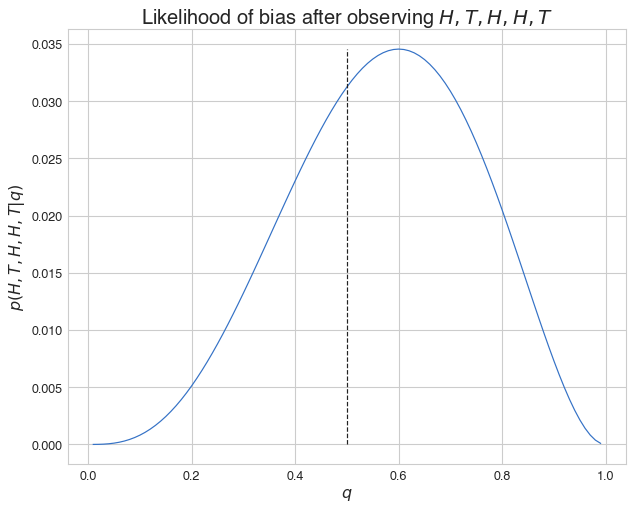

In [6]:
def likelihood(q,flips):
    '''
    Function to compute likelihood that sequence of coin flips are observed for a given probability of heads 'q'
    Input
        flips: array of 0s (for tails) and 1s (for heads)
        q: probability of heads to be considered (between 0 and 1)
    
    Output:
        likelihood p(flips|q)
    '''
    liks = np.empty(len(flips))
    liks[flips == 1.] = q
    liks[flips == 0.] = 1-q
    return(np.prod(liks))

# Coin flips from the example above
flips = np.array([1.,0.,1.,1.,0.])

#Ranges of q to be considered
qs = np.arange(.01,1,.01)

#Function to compute likelihoods
liks = list(map(lambda x: likelihood(x,flips),qs))

#Plot
plt.figure(1,(10,8))
plt.plot(qs,liks)
plt.plot([.5,.5],[0,max(liks)],'k--')
plt.ylabel("$p(H,T,H,H,T|q)$",size=16)
plt.xlabel("$q$",size=16)
plt.title("Likelihood of bias after observing $H,T,H,H,T$",size=20)

We see that the most probable value for our likelihood is $q=.6$,which probably shouldn't come as too much of a surprise - we did, afterall, see 60% heads. However, also notice that the distribution is pretty wide, including high probability for values around .6, which include .5. The width of this distribution can tell us something about how certain we are that .6 is in fact the correct bias.

What would happen if we observed 100 observations, and the proportions remained 60/40? As you can see below, our peak estimate is still $q=.6$, but now our distribution is much tighter, with less mass around .5. This should tell us that our coin is very likely biased towards heads.

Text(0.5, 1.0, 'Likelihood of bias after observing 60/100 heads')

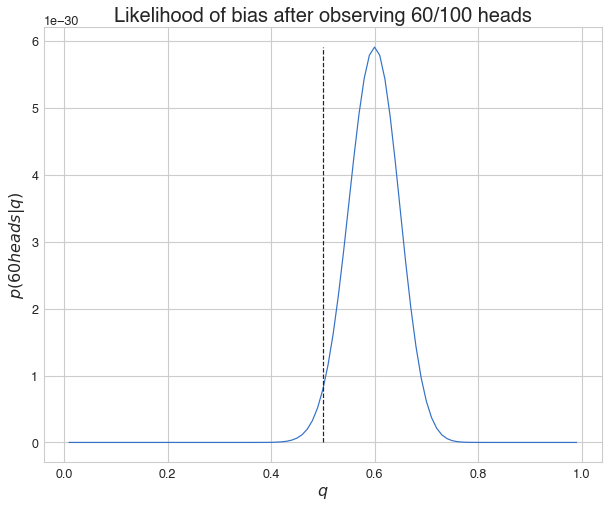

In [5]:
# New observations - 60 heads and 40 tails
flips100 = np.array([1.]*60+[0.]*40)
liks100 = list(map(lambda x: likelihood(x,flips100),qs))

plt.figure(2,(10,8))
plt.plot(qs,liks100)
plt.plot([.5,.5],[0,max(liks100)],'k--')
plt.ylabel("$p(60 heads|q)$",size=16)
plt.xlabel("$q$",size=16)
plt.title("Likelihood of bias after observing 60/100 heads",size=20)

Now that we have our likelihood, the next term we need is the prior $p(q)$. The prior expresses any prior belief/knowledge that we have that any of the values of $q$ are more/less likely than others.

If do not have any strong beliefs about any particular values of $q$, we could just model a flat prior, which gives equal weight to any and all values of $q$. This would just be equal to 1/number of values of q.

Alternatively, we may choose a prior that expresses some belief. For example, if we believe the team sometimes gives coins slightly biased towards heads. This could look something like this:

Text(0.5, 1.0, 'Narrow Prior')

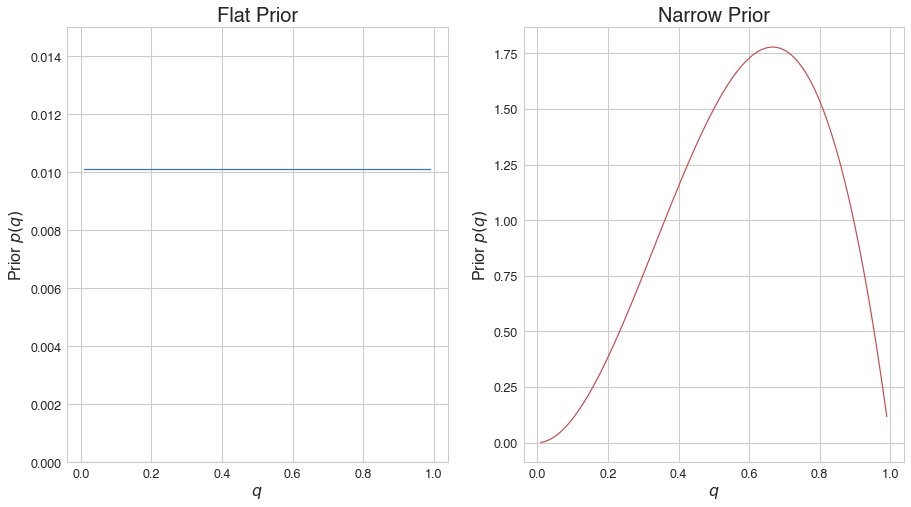

In [8]:
plt.figure(3,(15,8))
plt.subplot(1,2,1)
plt.plot(qs,np.ones(len(qs))/len(qs))
plt.ylabel("Prior $p(q)$",size=16)
plt.xlabel("$q$",size=16)
plt.ylim(0,.015)
plt.title("Flat Prior",size=20)

#Compute prior as a beta distribution with a slight bias towards heads
plt.subplot(1,2,2)
plt.plot(qs,sp.beta.pdf(qs,3,2),'r')
plt.ylabel("Prior $p(q)$",size=16)
plt.xlabel("$q$",size=16)
plt.title("Narrow Prior",size=20)

The numerator of our bayesian equation states that our poserior is proportional to the likelihood times the prior. As you can see below, the prior can have a strong influence on our posterior beliefs, particularly when there are few observations to go on. However, as we get more data, the prior has less and less influence, and the likelihood dominates.

For the plots below, note that we are also normalizing by the sum of $p(data|q)p(q)$ for all values of $q$. This does not change the ultimate shape of each distribution, but turns each distribution into a true probability distribution that sums to 1.

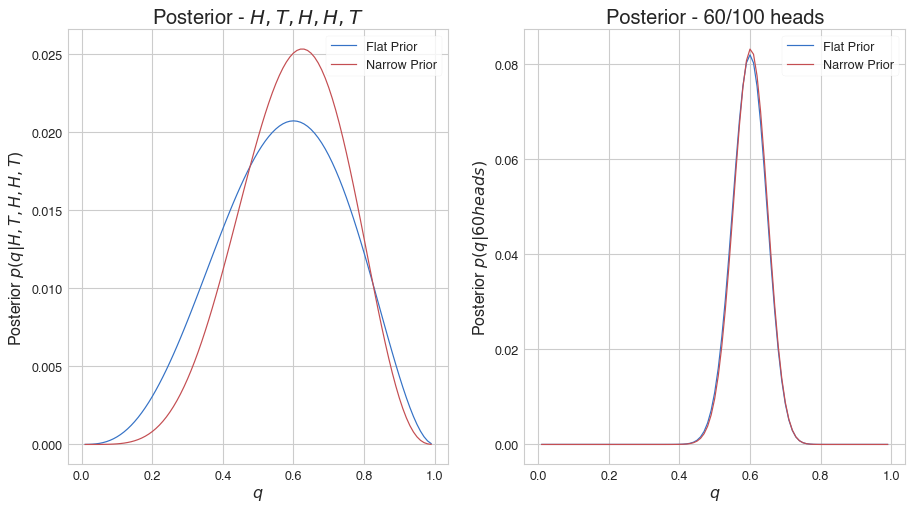

In [11]:
#Posterior with flat and narrow prior - few trials
flatPost5 = (liks*np.ones(len(qs))/len(qs))/sum(liks*np.ones(len(qs))/len(qs))
narrowPrior5 = (liks*sp.beta.pdf(qs,3,2))/sum(liks*sp.beta.pdf(qs,3,2))

plt.figure(4,(15,8))
plt.subplot(1,2,1)
plt.plot(qs,flatPost5,'b',label='Flat Prior')
plt.plot(qs,narrowPrior5,'r',label='Narrow Prior')
plt.ylabel("Posterior $p(q|H,T,H,H,T)$",size=16)
plt.xlabel("$q$",size=16)
plt.title("Posterior - $H,T,H,H,T$",size=20)
plt.legend()

#Posterior with flat and narrow prior - 100 trials
flatPost100 = (liks100*np.ones(len(qs))/len(qs))/sum(liks100*np.ones(len(qs))/len(qs))
narrowPrior100 = (liks100*sp.beta.pdf(qs,3,2))/sum(liks100*sp.beta.pdf(qs,3,2))
plt.subplot(1,2,2)
plt.plot(qs,flatPost100,'b',label='Flat Prior')
plt.plot(qs,narrowPrior100,'r',label='Narrow Prior')
plt.ylabel("Posterior $p(q|60heads)$",size=16)
plt.xlabel("$q$",size=16)
plt.title("Posterior - 60/100 heads",size=20)
plt.legend()

### 3) Bayesian modeling for learning tasks - Urn example

We can think about how to apply this type of framework to some of the types of tasks we run in the lab. For some of our inference tasks, we're usually given some noisy observations and asked to make judgements about latent, unobserved variables. One cannonical example is an urn task, where people observe beads drawn from some unknown urn and are asked to make inferences with the beads they observe.

Starting simply, imagine you observe draws, with replacement, of blue and red beads from one of two urns: one with 80% blue beads and the other with 80% red beads. With each draw, how confident can you be that the beads are being drawn from the blue or red urn? Lets set up a model for this task and see how it behaves.

#### 3.1) Urn estimation model

This model is very similar to our coin example - we can think about these urns as two sides of a coin, with blue beads corresponding to "heads" and red beads corresponding to "tails". We're also given a bit more information which we can use to make our inferences: we know that one urn has 80% blue beads, the other 20% blue beads (80% red beads). Therefore, instead of considering all of the values of $q$ we did in the example above, we only need to keep track of two values: .8 (blue urn) and .2 (red urn).

$$p(urn|beads)=\frac{p(beads|urn)p(urn)}{p(beads|urn = red)p(urn = red)+p(beads|urn=blue)p(urn=blue)}$$

For our purposes, lets assume that we have a flat prior over the urns (i.e., we do not expect one urn over the other). For this task, people will observe between 1 and 10 beads draws from one of the urns and be asked how confident they are that the beads are being drawn from the blue or red urn.

Lets get the model to do this task and see how it's estimates change with more bead draws.

(-0.05, 1.05)

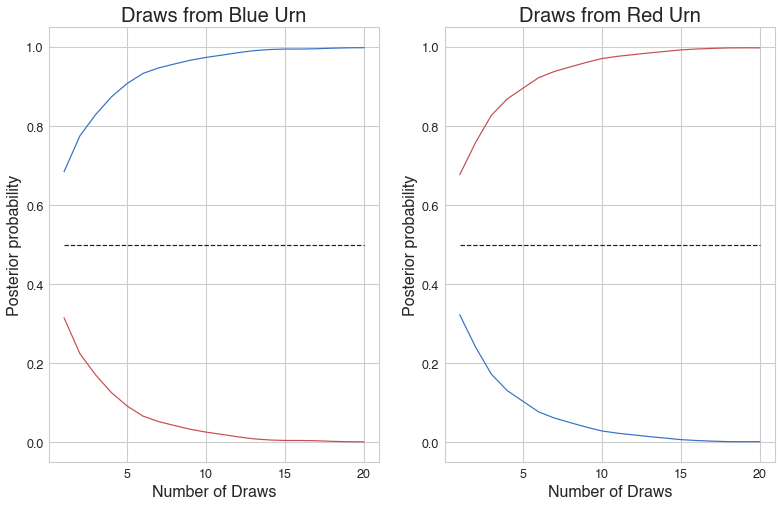

In [36]:
def urnEstimator(beads,qspace,qprior):
    """
    Function to implement urn estimation model
    Input
        beads: array of bead draws (1 = blue, 0 = red)
        qspace: array of q options to be considered - q here correcsponds to p(blue urn)
        prior: array of length qspace with prior probability for value for each value of q
    Output
        length q x trial matrix with posterior probability that beads are being drawn from urns with values q 
    """     
    posterior = np.zeros((len(qspace),len(beads)))
    for i in np.arange(len(beads)):
        #Get likelihood
        likelihood = qspace
        if beads[i] == 0:
            likelihood = 1-qspace
            
        #Multiply prior and posterior for each value of q being considered
        for qi in np.arange(len(qspace)):
            if i == 0:
                posterior[qi,i] = qprior[qi]*likelihood[qi] #use prior on first trial
            else:
                posterior[qi,i] = posterior[qi,i-1]*likelihood[qi] #use previous posterior afterwards
            
        #Normalize
        posterior[:,i] = posterior[:,i]/sum(posterior[:,i])
    return(posterior)

def genSims(nblocks,ntrials,q,qspace,qprior):
    """
    Function to run simulations of urn estimator
    Input
        nblocks: number of trial blocks to run
        ntrials: number of trials per block
        q: probability blue urn
        qspace: range of values of q to be considered
        qprior: prior probability for q values
    Output
        average model confidence for a each value of q considered
    """
    confidence = np.zeros((len(qspace),ntrials))
    for i in np.arange(nblocks):
        beads = np.array(np.random.uniform(0,1,ntrials)<q).astype(float) #generate bernoulli random samples
        urnEst = urnEstimator(beads,qspace,qprior)
        for qi in np.arange(len(qspace)):
            confidence[qi,:] = confidence[qi,:]+(urnEst[qi,:]*(1/nblocks))          
    return(confidence)

#Simulate
ntrials=20
nsim = 1000
qspace = np.array([.2,.8])
qprior = np.array([.5,.5])

#Simulations from a blue urn
confidence_blue = genSims(nsim,ntrials,.8,qspace,qprior)
#Simulations from a red urn
confidence_red = genSims(nsim,ntrials,.2,qspace,qprior)

plt.figure(6,(13,8))
plt.subplot(1,2,1)
plt.plot(np.arange(1,ntrials+1).astype('int'),confidence_blue[1,:],'b',label="$p(urn=blue|beads$)")
plt.plot(np.arange(1,ntrials+1).astype('int'),confidence_blue[0,:],'r',label="$p(urn=red|beads$)")
plt.plot([1,nt],[.5,.5],'k--')
plt.ylabel("Posterior probability",size=16)
plt.xlabel("Number of Draws",size=16)
plt.title("Draws from Blue Urn",size=20)
plt.ylim(-.05,1.05)

plt.subplot(1,2,2)
plt.plot(np.arange(1,ntrials+1).astype('int'),confidence_red[1,:],'b',label="$p(urn=blue|beads$)")
plt.plot(np.arange(1,ntrials+1).astype('int'),confidence_red[0,:],'r',label="$p(urn=red|beads$)")
plt.plot([1,nt],[.5,.5],'k--')
plt.ylabel("Posterior probability",size=16)
plt.xlabel("Number of Draws",size=16)
plt.title("Draws from Red Urn",size=20)
plt.ylim(-.05,1.05)


#### 3.2) Urn estimation model in a volatile environment

In a lot of the task we study in the lab, environments aren't as stable as in the example above. Beads could be drawn from one urn, then, with some probability $H$ switch to the other urn. This $H$ is what we refer to as the hazard rate - the probably that the source generating the current observations will switch on any trial.

Lets simulate a few examples of what this would look like.

Text(0.5, 1.0, 'High Hazard Rate (.9)')

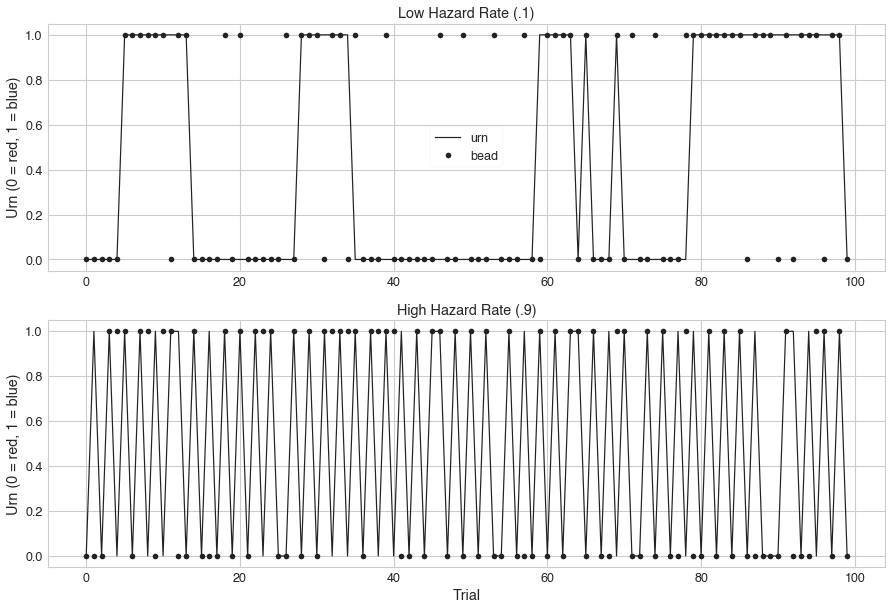

In [50]:
def genHazardStim(ntrials,q,h):
    """
    Function to generate bead draws with a particular hazard rate
    Input
        ntrials: number of trials to be generated
        q: urn noise (0 to 1)
        h: hazard rate (0 to 1)
    Output
        sequence of beads and the urn from which the beads were drawn
        beads: 1 = blue bead, 0 = red bead
        urns: 1 = blue urn, 0 = red urn
    """
    beads = np.zeros(ntrials)
    urns = np.zeros(ntrials)
    urnIDs = np.array([0,1])
    currUrn = np.random.choice([0,1])
    for i in np.arange(ntrials):
        #Draw bead from current urn
        urns[i] = currUrn
        if currUrn == 0:
            beads[i] = int(np.random.uniform(0,1)<(1-q))
        else:
            beads[i] = int(np.random.uniform(0,1)<q)
        
        #Check if urn switch should occur
        if np.random.uniform(0,1)<h:
            currUrn = urnIDs[urnIDs!=currUrn][0]

    return(beads,urns)

#Plot hazards
trials = np.arange(100)
l_beads,l_urns = genHazardStim(100,.8,.1)
h_beads,h_urns = genHazardStim(100,.8,.9)
plt.figure(7,(15,10))
plt.subplot(2,1,1)
plt.plot(trials,l_urns,'k-',label='urn')
plt.plot(trials,l_beads,'ko',label='bead')
plt.ylabel('Urn (0 = red, 1 = blue)')
plt.title('Low Hazard Rate (.1)')
plt.legend()


plt.subplot(2,1,2)
plt.plot(trials,h_urns,'k-')
plt.plot(trials,h_beads,'ko')
plt.ylabel('Urn (0 = red, 1 = blue)')
plt.xlabel('Trial')
plt.title('High Hazard Rate (.9)')
        

If our environment switches, we need to take this into account in our model. If we stick with the urn estimation task, here is our model:

$$p(urn_n|beads_{1:n},hazard)=\frac{p(beads_{1:n},hazard|urn_n)p(urn_n)}{\sum_{urn_n}p(beads_{1:n},hazard|urn_n)p(urn_n)}$$

The way to think about this is that we start with steps we've implemented above, but then adjust our expectation on the next trial to account for the probability that a switch may occur.

So if say I know there are two urns with 80/20 splits, and I see a blue bead, the first step is to multiply our likelihood and priors as before

$$p(blue|urn = blue)p(urn = blue) = .8\times.5 = .4$$
$$p(blue|urn = red)p(urn = red) = .2\times.5 = .1$$

Then, before the next draw, adjust our expectations to account for the fact that a switch may occur. In a low hazard regime this would like:

$$p(urn = blue|blue,h=.1) = (1-h)\times p(blue|urn = blue)p(urn = blue) + h\times p(blue|urn = red)p(urn = red)$$
$$p(urn = blue|blue,h=.1) = (.9\times .4) + (h\times .1)$$
$$= .37$$

$$p(urn = red|blue,h=.1) = (1-h)\times p(blue|urn = red)p(urn = red) + h\times p(blue|urn = blue)p(urn = blue)$$
$$p(urn = red|blue,h=.1) = (.9\times .1) + (h\times .4)$$
$$= .13$$

After normalizing, we end up with

$$p(urn = blue|blue,h=.1) = .74$$
$$p(urn = red|blue,h=.1) = .26$$

Here is an example of this type of model learning in the hazard environments above

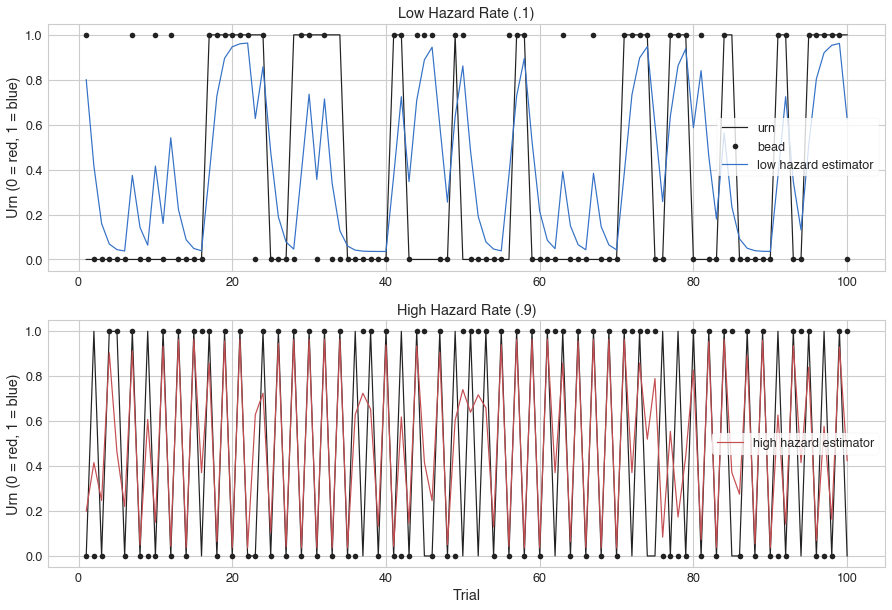

In [80]:
def urnEstimatior_h(beads,qspace,h,qprior):
    """
    Function that simulates behavior from a learning model that also considers a hazard rate
    Input
        beads: array of bead draws (1 = blue, 0 = red)
        qspace: array of q options to be considered - q here correcsponds to p(blue urn)
        h: hazard rate
        qprior: array of length qspace with prior probability for value for each value of q
    Output
        length q x trial matrix with posterior probability that beads are being drawn from urns with values q 
    
    """
    posterior = np.zeros((len(qspace),len(beads)))
    for i in np.arange(len(beads)):
        
        #Get previous posterior as new prior and apply hazard rate
        if i == 0:
            posterior[:,i] = qprior
        else:
            posterior[:,i] = posterior[:,i-1]
            post_qs = np.array(list(map(lambda x: posterior[x,i],np.arange(len(qspace))))) #necessary because of python weirdness
            for qi in np.arange(len(qspace)):
                posterior[qi,i] = (1-h)*post_qs[qi] + h*(post_qs[np.arange(len(qspace))!=qi])
                
        #Get likelihood
        likelihood = qspace
        if beads[i] == 0:
            likelihood = 1-qspace
            
        #Multiply prior and posterior for each value of q being considered
        for qi in np.arange(len(qspace)):
            posterior[qi,i] = posterior[qi,i]*likelihood[qi]
            
        #Normalize
        posterior[:,i] = posterior[:,i]/sum(posterior[:,i])
    return(posterior)
        
        
#Plot hazards
qspace = np.array([.2,.8])
qprior = np.array([.5,.5])
ntrials = 100
trials = np.arange(1,ntrials+1)
l_beads,l_urns = genHazardStim(ntrials,.8,.1)
l_post = urnEstimatior_h(l_beads,qspace,.1,qprior)[1,:]
plt.figure(7,(15,10))
plt.subplot(2,1,1)
plt.plot(trials,l_urns,'k-',label='urn')
plt.plot(trials,l_beads,'ko',label='bead')
plt.plot(trials,l_post,'b-',label='low hazard estimator')
plt.ylabel('Urn (0 = red, 1 = blue)')
plt.title('Low Hazard Rate (.1)')
plt.legend()


plt.subplot(2,1,2)
h_beads,h_urns = genHazardStim(ntrials,.8,.9)
h_post = urnEstimatior_h(h_beads,qspace,.9,qprior)[1,:]
plt.plot(trials,h_urns,'k-')
plt.plot(trials,h_beads,'ko')
plt.plot(trials,h_post,'r-',label='high hazard estimator')
plt.ylabel('Urn (0 = red, 1 = blue)')
plt.xlabel('Trial')
plt.title('High Hazard Rate (.9)')
plt.legend()

#### 3.3) Urn estimation and hazard rate estimation



In [94]:
def urnHazardEstimatior(beads,qspace,hspace,qprior,hprior):
    
    posterior = np.zeros((len(beads),len(qspace),len(hspace)))
    for i in np.arange(len(beads)):
        
        #Get previous posterior as new prior and apply hazard rate
        if i == 0:
            for hi in np.arange(len(hspace)):
                posterior[i,:,hi] = qprior
            posterior[i,:,:] = posterior[i,:,:]/sum(posterior[i,:,:])
        else:
            #Iterate through all considered hazard rates
            posterior[i,:,:] = posterior[i-1,:,:]
            for hi in np.arange(len(hspace)):
                post_qs = np.array(list(map(lambda x: posterior[i,x,hi],np.arange(len(qspace))))) #necessary because of python weirdness
                for qi in np.arange(len(qspace)):
                    h = hspace[hi]
                    posterior[i,qi,hi] = (1-h)*post_qs[qi] + h*(post_qs[np.arange(len(qspace))!=qi])
                
        #Get likelihood
        likelihood = qspace
        if beads[i] == 0:
            likelihood = 1-qspace
            
        #Multiply prior and posterior for each value of q being considered
        for hi in np.arange(len(hspace)):
            for qi in np.arange(len(qspace)):
                posterior[i,qi,hi] = posterior[i,qi,hi]*likelihood[qi]
            
        #Normalize
        posterior[i,:,:] = posterior[i,:,:]/sum(posterior[i,:,:])
    return(posterior)

In [97]:
qspace = np.array([.2,.8])
hspace = np.array([.1,.9])
qprior = np.array([.5,.5])
hprior = np.array([.5,.5])
ntrials = 10
trials = np.arange(1,ntrials+1)
l_beads,l_urns = genHazardStim(ntrials,.8,.1)
l_post = urnHazardEstimatior(l_beads,qspace,hspace,qprior,hprior)
print(l_post)
l_post_blue = np.array(list(map(lambda x: sum(l_post[x,1,:]),np.arange(ntrials))))
print(l_post_blue)
# plt.figure(7,(15,10))
# plt.subplot(2,1,1)
# plt.plot(trials,l_urns,'k-',label='urn')
# plt.plot(trials,l_beads,'ko',label='bead')
# plt.plot(trials,l_post,'b-',label='low hazard estimator')
# plt.ylabel('Urn (0 = red, 1 = blue)')
# plt.title('Low Hazard Rate (.1)')
# plt.legend()



[[[0.8        0.8       ]
  [0.2        0.2       ]]

 [[0.41573034 0.08074534]
  [0.58426966 0.91925466]]

 [[0.16008316 0.55925156]
  [0.83991684 0.44074844]]

 [[0.06878174 0.17129593]
  [0.93121826 0.82870407]]

 [[0.04385537 0.44588784]
  [0.95614463 0.55411216]]

 [[0.03757825 0.22922352]
  [0.96242175 0.77077648]]

 [[0.03603029 0.38733424]
  [0.96396971 0.61266576]]

 [[0.37166036 0.85205468]
  [0.62833964 0.14794532]]

 [[0.72505663 0.52772733]
  [0.27494337 0.47227267]]

 [[0.89475645 0.78541539]
  [0.10524355 0.21458461]]]
[0.4        1.50352432 1.28066528 1.75992233 1.51025679 1.73319824
 1.57663547 0.77628496 0.74721604 0.31982816]


In [93]:
a = np.zeros((6,2,2))
print(a)

[[[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]]
